# Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bgr_flat_chess = cv2.imread("DATA/flat_chessboard.png")
rgb_flat_chess = cv2.cvtColor(bgr_flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(bgr_flat_chess, cv2.COLOR_BGR2GRAY)

bgr_real_chess = cv2.imread("DATA/real_chessboard.jpg")
rgb_real_chess = cv2.cvtColor(bgr_real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(bgr_real_chess, cv2.COLOR_BGR2GRAY)

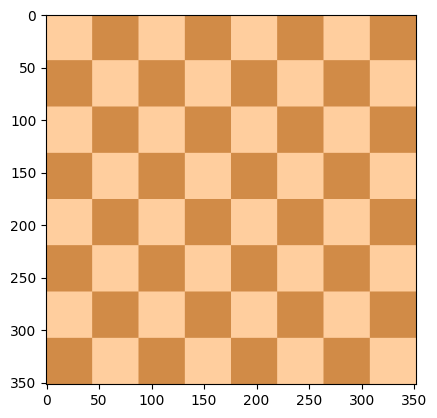

In [3]:
plt.imshow(rgb_flat_chess)

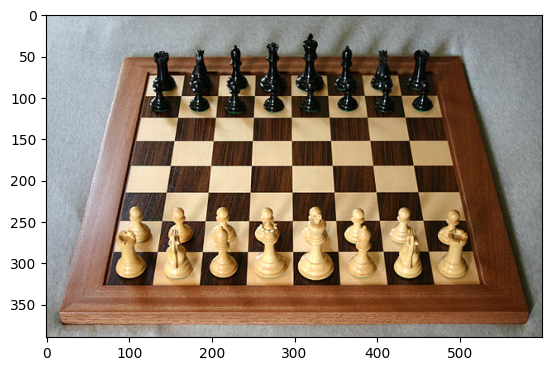

In [4]:
plt.imshow(rgb_real_chess)

## Harris Corner Detection

**cornerHarris()**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size.
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter.
*  borderType Pixel extrapolation method.

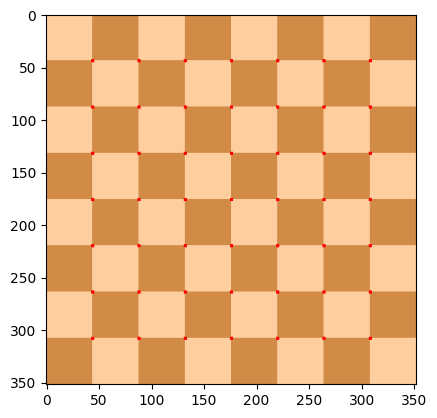

In [5]:
dst = cv2.cornerHarris(src=gray_flat_chess, blockSize=2, ksize=3, k=0.04)

# Threshold for an optimal value, it may vary depending on the image.
rgb_flat_chess[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(rgb_flat_chess)

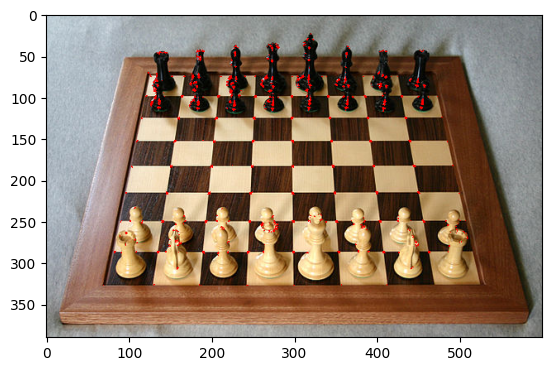

In [6]:
dst = cv2.cornerHarris(src=gray_real_chess, blockSize=2, ksize=3, k=0.04)

# Threshold for an optimal value, it may vary depending on the image.
rgb_real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(rgb_real_chess)

## Shi-Tomasi Detection

**goodFeatureToTrack()**

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01, then all the corners with the quality measure less than 15 are rejected.

In [7]:
bgr_flat_chess = cv2.imread("DATA/flat_chessboard.png")
rgb_flat_chess = cv2.cvtColor(bgr_flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(bgr_flat_chess, cv2.COLOR_BGR2GRAY)

bgr_real_chess = cv2.imread("DATA/real_chessboard.jpg")
rgb_real_chess = cv2.cvtColor(bgr_real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(bgr_real_chess, cv2.COLOR_BGR2GRAY)

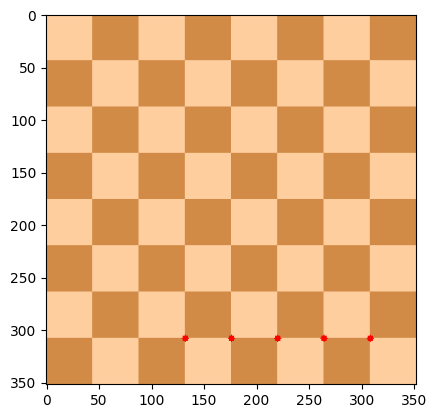

In [8]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 5, 0.01, 10) # Only 5 points
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(rgb_flat_chess, (x, y), 3, 255, -1)

plt.imshow(rgb_flat_chess)

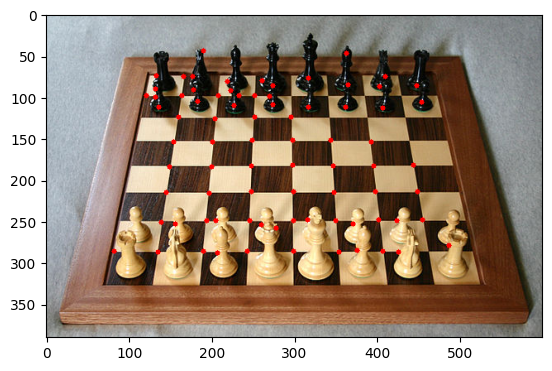

In [9]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10) # Only 80 points
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(rgb_real_chess, (x, y), 3, 255, -1)

plt.imshow(rgb_real_chess)